In [1]:
# Standard scientific Python imports
import matplotlib.pyplot as plt
# Import datasets, classifiers and performance metrics
from sklearn import datasets, svm, metrics
from sklearn.model_selection import train_test_split

Le problème d'apprentissage est une classification avec l'algorithme d'apprentissage Support Vector Machine. Je m'explique:

-Reconnaitre un chiffre à travers une matrice donnée ou les valeurs de la matrice representent les valeurs des pixels devant constituer le chiffre. C'est matrice sont générér à travers différentes manière d'écrire un chiffre.
-Le modèle va essayer de predire le chiffre representant une nouvelle matrice donnée en se basant sur ce qu'il a appris lors de l'entrainement, C'est là où rentre la SVM. 
-Le problème est à 3 dimensions: la première represente la cible (le chiffre en question) et les 2 autres pour definir la matrice constituée par la valeur des pixels permettant de definir le cible.

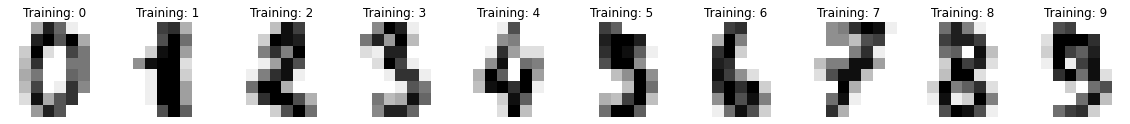

In [2]:
digits = datasets.load_digits()

_, axes = plt.subplots(nrows=1, ncols=10, figsize=(20, 3))
for ax, image, label in zip(axes, digits.images, digits.target):
    ax.set_axis_off()
    ax.imshow(image, cmap=plt.cm.gray_r, interpolation="nearest")
    ax.set_title("Training: %i" % label)

In [78]:
print(digits)

{'data': array([[ 0.,  0.,  5., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ..., 10.,  0.,  0.],
       [ 0.,  0.,  0., ..., 16.,  9.,  0.],
       ...,
       [ 0.,  0.,  1., ...,  6.,  0.,  0.],
       [ 0.,  0.,  2., ..., 12.,  0.,  0.],
       [ 0.,  0., 10., ..., 12.,  1.,  0.]]), 'target': array([0, 1, 2, ..., 8, 9, 8]), 'frame': None, 'feature_names': ['pixel_0_0', 'pixel_0_1', 'pixel_0_2', 'pixel_0_3', 'pixel_0_4', 'pixel_0_5', 'pixel_0_6', 'pixel_0_7', 'pixel_1_0', 'pixel_1_1', 'pixel_1_2', 'pixel_1_3', 'pixel_1_4', 'pixel_1_5', 'pixel_1_6', 'pixel_1_7', 'pixel_2_0', 'pixel_2_1', 'pixel_2_2', 'pixel_2_3', 'pixel_2_4', 'pixel_2_5', 'pixel_2_6', 'pixel_2_7', 'pixel_3_0', 'pixel_3_1', 'pixel_3_2', 'pixel_3_3', 'pixel_3_4', 'pixel_3_5', 'pixel_3_6', 'pixel_3_7', 'pixel_4_0', 'pixel_4_1', 'pixel_4_2', 'pixel_4_3', 'pixel_4_4', 'pixel_4_5', 'pixel_4_6', 'pixel_4_7', 'pixel_5_0', 'pixel_5_1', 'pixel_5_2', 'pixel_5_3', 'pixel_5_4', 'pixel_5_5', 'pixel_5_6', 'pixel_5_7', 'pixel_6_0', '

In [76]:
print("Taille digits.images :",len(digits.images))
data.shape

Taille digits.images : 1797


(1797, 64)

In [34]:
digits.target

array([0, 1, 2, ..., 8, 9, 8])

En conclusion, le dataset "digit" est un dictionnaire comportant :
-des images sous formes matrielles (data) de taille (1797, 64);
-target_name : les différents cibles
-le target constitué par les élements de "target_name"
-images: 

In [4]:
# flatten the images
n_samples = len(digits.images)
data = digits.images.reshape((n_samples, -1))

# Create a classifier: a support vector classifier
clf = svm.SVC(gamma=0.001)

# Split data into 50% train and 50% test subsets
X_train, X_test, y_train, y_test = train_test_split(
    data, digits.target, test_size=0.5, shuffle=False
)

# Learn the digits on the train subset
clf.fit(X_train, y_train)

# Predict the value of the digit on the test subset
predicted = clf.predict(X_test)

In [11]:
print("10ers Données attendues: ", y_test[:10], "\n")
print("10ers Valeurs prédites: ", predicted[:10], "\n")

10ers Données attendues:  [8 8 4 9 0 8 9 8 1 2] 

10ers Valeurs prédites:  [8 8 4 9 0 8 9 8 1 2] 



In [6]:
clf.score(X_test, y_test)

0.9688542825361512

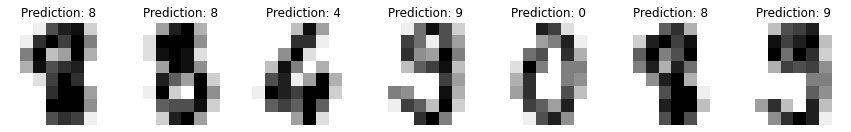

In [77]:
_, axes = plt.subplots(nrows=1, ncols=7, figsize=(15, 3))
for ax, image, prediction in zip(axes, X_test, predicted):
    ax.set_axis_off()
    image = image.reshape(8, 8)
    ax.imshow(image, cmap=plt.cm.gray_r, interpolation="nearest") #
    ax.set_title(f"Prediction: {prediction}")

In [8]:
print(
    f"Classification report for classifier {clf}:\n"
    f"{metrics.classification_report(y_test, predicted)}\n"
)

Classification report for classifier SVC(gamma=0.001):
              precision    recall  f1-score   support

           0       1.00      0.99      0.99        88
           1       0.99      0.97      0.98        91
           2       0.99      0.99      0.99        86
           3       0.98      0.87      0.92        91
           4       0.99      0.96      0.97        92
           5       0.95      0.97      0.96        91
           6       0.99      0.99      0.99        91
           7       0.96      0.99      0.97        89
           8       0.94      1.00      0.97        88
           9       0.93      0.98      0.95        92

    accuracy                           0.97       899
   macro avg       0.97      0.97      0.97       899
weighted avg       0.97      0.97      0.97       899




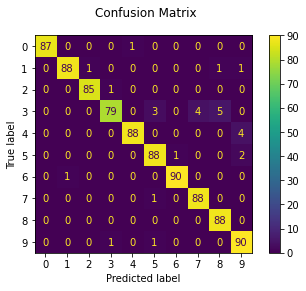

In [9]:
disp = metrics.ConfusionMatrixDisplay.from_predictions(y_test, predicted)
disp.figure_.suptitle("Confusion Matrix")
# print(f"Confusion matrix:\n{disp.confusion_matrix}")

plt.show()